# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset = pd.read_csv('datasets/Position_Salaries.csv')

In [3]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]


# Create model

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [7]:
train_predictions = lr.predict(X)

Creating a polynomial model

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
polynom = PolynomialFeatures(degree=4)
X_poly = polynom.fit_transform(X)
print(X_poly[:5])

[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]


In [39]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

LinearRegression()

# Plotting

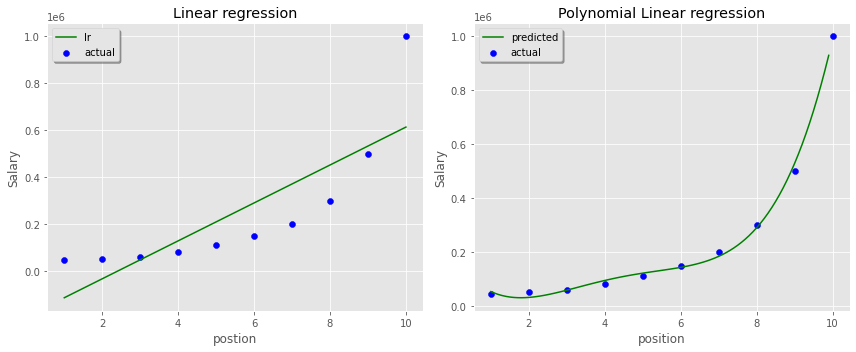

In [48]:
from matplotlib import gridspec
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1,1])
ax1 = fig.add_subplot(gs[0])

ax1.scatter(X, y, c='b', label='actual')
ax1.plot(X, train_predictions, c='g', label='lr')
ax1.set_xlabel('postion')
ax1.set_ylabel('Salary')
ax1.set_title('Linear regression')
# ax1.legend(loc='upper left', bbox_to_anchor=(1,1))
ax1.legend(shadow=True)

ax2 = fig.add_subplot(gs[1])
granular_x = np.arange(min(X), max(X), 0.1)
x_axis = np.reshape(granular_x, (len(granular_x), 1))
y_axis = lr_poly.predict(polynom.transform(x_axis))
ax2.plot(x_axis, y_axis, c='g', label='predicted')
ax2.scatter(X, y, c='b', label='actual')
ax2.set_xlabel('position')
ax2.set_ylabel('Salary')
ax2.set_title('Polynomial Linear regression')
ax2.legend(shadow=True)

plt.tight_layout()

# Predicting new value

In [51]:
lr_poly.predict(polynom.transform([[6.5]]))

array([158862.45265155])